Tutorial 3: Galaxies
====================

In this example, we'll use 'mass_profiles' and 'light_profiles' modules introduced previously, along with the
'galaxy' module to create _Galaxy_ objects in PyAutoLens. We'll see that:

1) _Galaxy_'s can be made from multiple _LightProfile_'s and _MassProfile_'s.

2) By taking multiple components, the summed image / deflection angle's of the profiles are computed.

3) _Galaxy_'s have redshifts, defining where they are relative to one another in lensing calculations.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

Lets use an identical _Grid_ to the previous example.

In [2]:
grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

Lets make a galaxy with an _EllipticalSersic_ _LightProfile_, by making an _EllipticalSersic_ _LightProfile_ and 
passing it to a _Galaxy_ object.

In [3]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

galaxy_with_light_profile = al.Galaxy(redshift=0.5, light=sersic_light_profile)

print(galaxy_with_light_profile)

Redshift: 0.5
Light Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In the previous example, we passed _Grid_'s to the _LightProfile_ module to compute its image. We can do the exact same 
with _Galaxy_'s to again compute the _Galaxy_'s image.

In [4]:
galaxy_image = galaxy_with_light_profile.image_from_grid(grid=grid)

print("intensity of _Grid_ pixel 0:")
print(galaxy_image.in_2d[0, 0])
print("intensity of _Grid_ pixel 1:")
print(galaxy_image.in_2d[0, 1])
print("intensity of _Grid_ pixel 2:")
print(galaxy_image.in_2d[0, 2])
print("etc.")

intensity of _Grid_ pixel 0:
0.04538426447251817
intensity of _Grid_ pixel 1:
0.04593933816109038
intensity of _Grid_ pixel 2:
0.046499005272481395
etc.


A galaxy _Plotter_ allows us to the plot the image, just like the _Profile_ plotters did for a _LightProfile_'s.

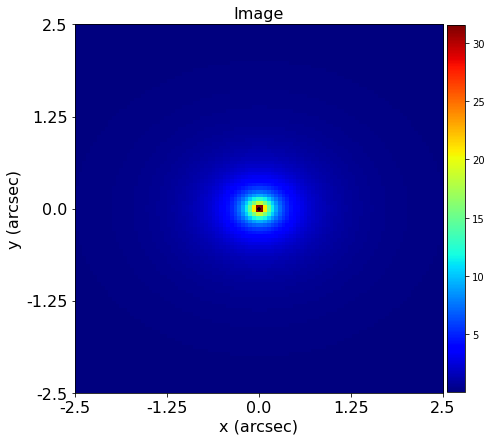

In [5]:
aplt.Galaxy.image(galaxy=galaxy_with_light_profile, grid=grid)

We can pass galaxies as many profiles as we like. Lets create a galaxy with three _LightProfile_'s.

In [10]:
light_profile_1 = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=2.5
)

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=3.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(1.0, -1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

galaxy_with_3_light_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
)

print(galaxy_with_3_light_profiles)

Redshift: 0.5
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5
SphericalSersic
centre: (1.0, 1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 3.0
SphericalSersic
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 2.0


If we plot the galaxy, we see 3 blobs of light!

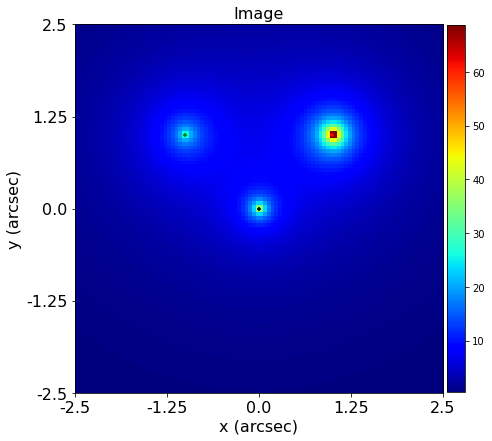

In [11]:
aplt.Galaxy.image(galaxy=galaxy_with_3_light_profiles, grid=grid)

We can also plot each individual _LightProfile_ using the 'subplot' galaxy plotter.

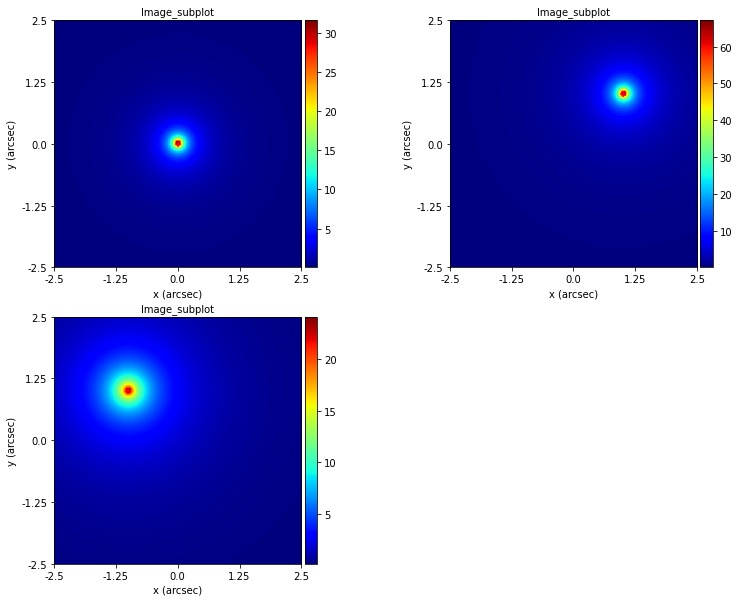

In [12]:
aplt.Galaxy.image_subplot(galaxy=galaxy_with_3_light_profiles, grid=grid)

_MassProfile_'s interact with _Galaxy_ objects in the exact same way as _LightProfile_'s. Lets create a galaxy with three 
SIS _MassProfile_'s. 

In [13]:
mass_profile_1 = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)

mass_profile_2 = al.mp.SphericalIsothermal(centre=(1.0, 1.0), einstein_radius=1.0)

mass_profile_3 = al.mp.SphericalIsothermal(centre=(1.0, -1.0), einstein_radius=1.0)

galaxy_with_3_mass_profiles = al.Galaxy(
    redshift=0.5, mass_1=mass_profile_1, mass_2=mass_profile_2, mass_3=mass_profile_3
)

print(galaxy_with_3_mass_profiles)

Redshift: 0.5
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, 1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0


We can use a galaxy _Plotter_ to plot these deflection angles. (Deflection angles of _MassProfile_'s add together just 
like the _LightProfile_ image's above)

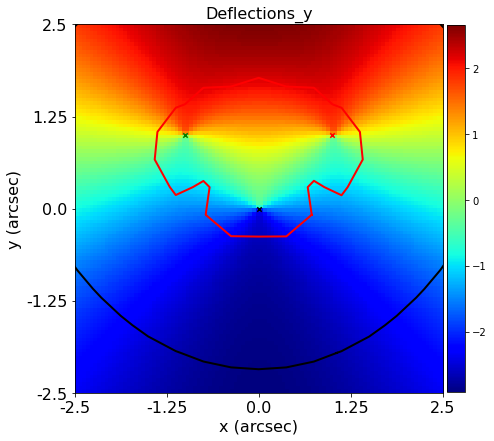

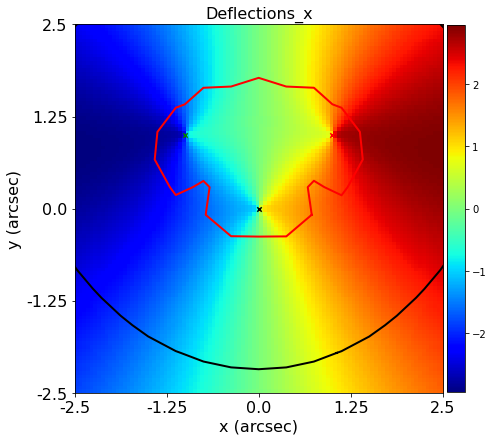

In [14]:
aplt.Galaxy.deflections_y(galaxy=galaxy_with_3_mass_profiles, grid=grid)

aplt.Galaxy.deflections_x(galaxy=galaxy_with_3_mass_profiles, grid=grid)

I wonder what 3 summed convergence maps or potential's look like ;)

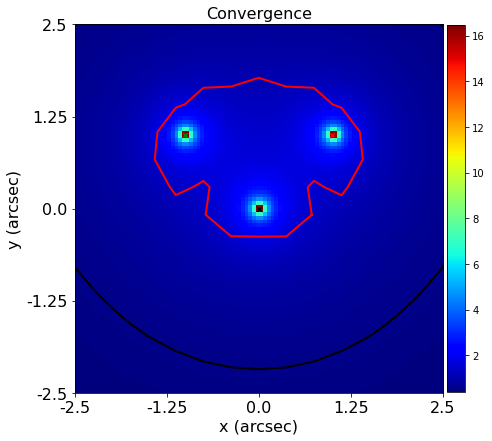

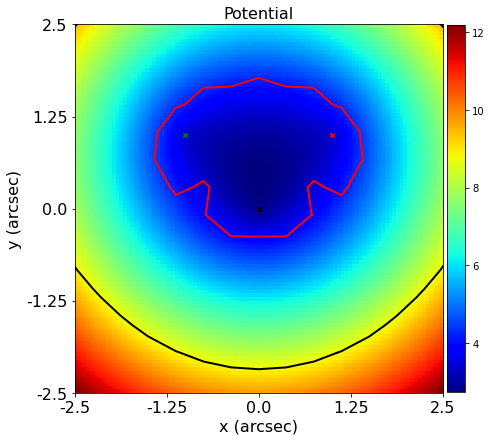

In [15]:
aplt.Galaxy.convergence(galaxy=galaxy_with_3_mass_profiles, grid=grid)

aplt.Galaxy.potential(galaxy=galaxy_with_3_mass_profiles, grid=grid)

Finally, a galaxy can take both light and mass profiles, and there is no limit to how many we pass it.

In [16]:

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(2.0, 2.0), intensity=1.0, effective_radius=3.0, sersic_index=3.0
)

light_profile_4 = al.lp.EllipticalSersic(
    centre=(1.0, -1.0),
    elliptical_comps=(0.3, 0.0),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=1.0,
)

mass_profile_1 = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)

mass_profile_2 = al.mp.SphericalIsothermal(centre=(1.0, 1.0), einstein_radius=2.0)

mass_profile_3 = al.mp.SphericalIsothermal(centre=(2.0, 2.0), einstein_radius=3.0)

mass_profile_4 = al.mp.EllipticalIsothermal(
    centre=(1.0, -1.0), elliptical_comps=(0.333333, 0.0), einstein_radius=2.0
)

galaxy_with_many_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
    light_4=light_profile_4,
    mass_1=mass_profile_1,
    mass_2=mass_profile_2,
    mass_3=mass_profile_3,
    mass_4=mass_profile_4,
)

Suffice to say, the _Galaxy_'s images, convergence, potential and deflections look pretty interesting.

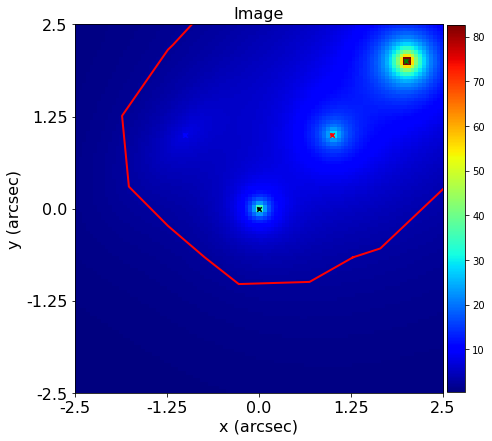

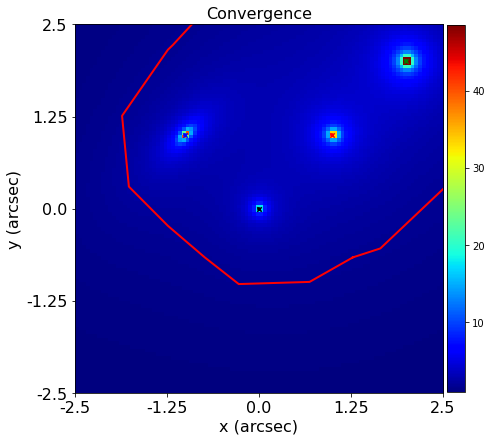

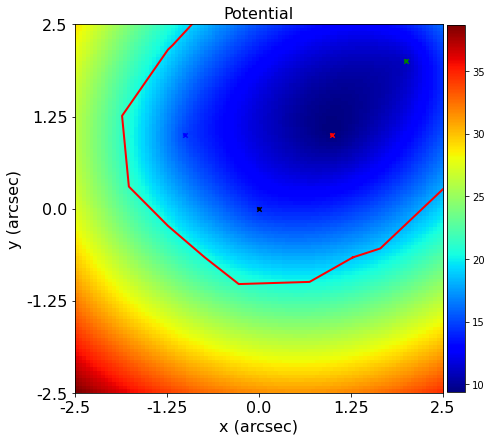

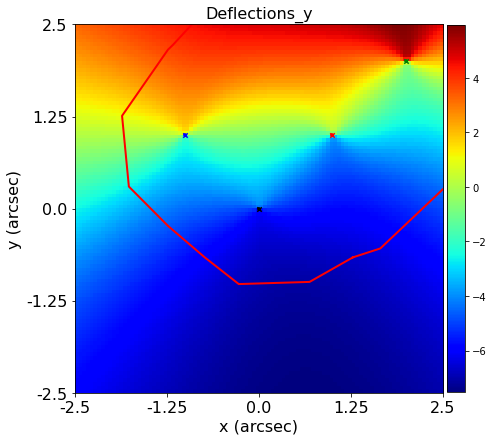

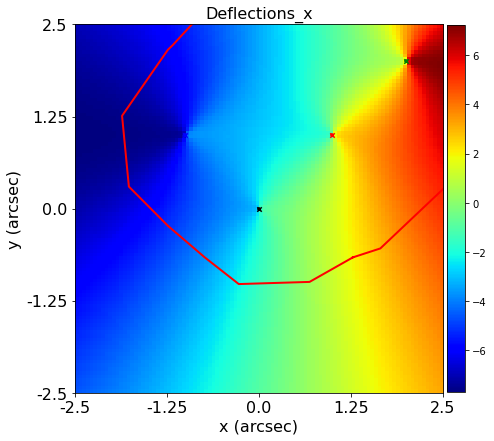

In [17]:
aplt.Galaxy.image(galaxy=galaxy_with_many_profiles, grid=grid)

aplt.Galaxy.convergence(galaxy=galaxy_with_many_profiles, grid=grid)

aplt.Galaxy.potential(galaxy=galaxy_with_many_profiles, grid=grid)

aplt.Galaxy.deflections_y(galaxy=galaxy_with_many_profiles, grid=grid)

aplt.Galaxy.deflections_x(galaxy=galaxy_with_many_profiles, grid=grid)

And we're done.